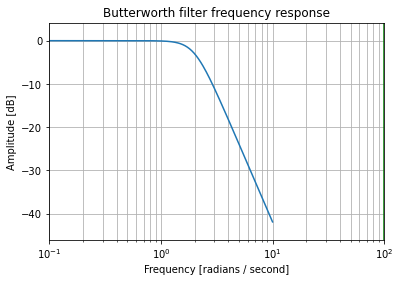

In [1]:
from scipy import signal
>>> import matplotlib.pyplot as plt 
import numpy as np
import math

b, c = signal.butter(3, 2 , 'low', analog=True)
w, h = signal.freqs(b, c)
>>> plt.plot(w, 20 * np.log10(abs(h)))
>>> plt.xscale('log')
>>> plt.title('Butterworth filter frequency response')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.show()


In [ ]:
b, c = signal.butter(3, 2 , 'low', analog=True)
w, h = signal.freqs(b, c)


In [ ]:
>>> plt.plot(w, 20 * np.log10(abs(h)))
>>> plt.xscale('log')
>>> plt.title('Butterworth filter frequency response')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.show()

In [2]:
## Generate PAM Symbols with Eb=1.0
N=200
a=2*np.random.randint(2, size=N)-1.0     

## is this the correct way to define ar? 

In [3]:
## Overampling factor, i.e., number of samples per symbol period
M=64

In [4]:
## Transmitter Pulse Shaped Data
s=signal.upfirdn(h,a,M)
n2=np.arange(len(s))

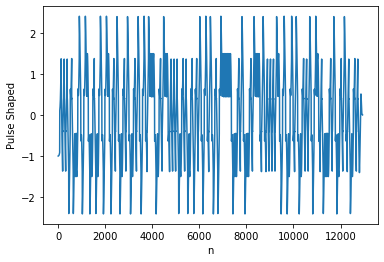

In [5]:
plt.plot(n2,np.real(s))
plt.xlabel('n')
plt.ylabel('Pulse Shaped')
plt.show()

In [6]:
## Receive Matched Filtered Data
r=signal.upfirdn(h,s)
n3=np.arange(len(r))

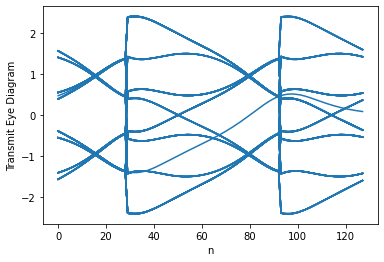

In [7]:
delay=int((len(h)-1)/2)
for k in range( math.floor( (len(s)-delay)/(2*M) ) ):
    plt.plot(np.real(s)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Transmit Eye Diagram')
plt.show()

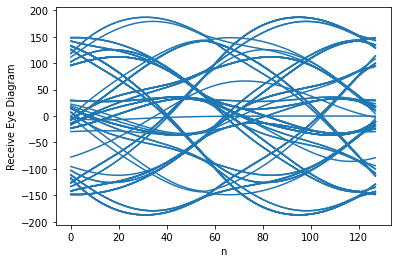

In [8]:
## Receiver Eye Diagram

delay=len(h)-1

for k in range( math.floor( (len(r)-delay)/(2*M) ) ):
    plt.plot(np.real(r)[delay+k*2*M:delay+(k+1)*2*M],'C0-')
plt.xlabel('n')
plt.ylabel('Receive Eye Diagram')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

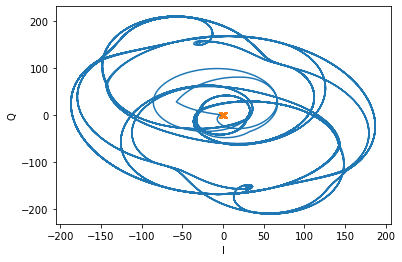

In [9]:
## Receiver Constellation Plot

plt.plot(np.real(r),np.imag(r))
plt.plot(np.real(a),np.imag(a),'x')
plt.xlabel('I')
plt.ylabel('Q')
plt.show